In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib inline

In [2]:
colors = ['hotpink', 'cyan', 'yellow',  'mediumpurple']

### Fundamental Concepts

#### Linear Combination

*Linear combination* of vectors $\overrightarrow{v}$ and $\overrightarrow{w}$ can be represented as :
$$ a \overrightarrow{v} + b \overrightarrow{w}$$
where *a* and *b* are scalers.

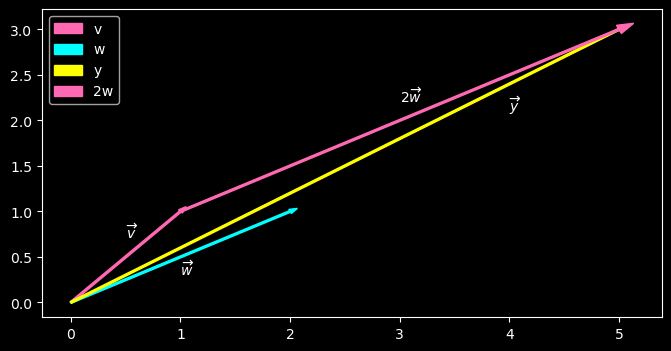

In [3]:
v = np.array([[1], [1]])
w = np.array([[2], [1]])

a, b = 1, 2
y = a * v + b * w 
labels = ['v', 'w', 'y']

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
for i, k in enumerate((v, w, y)):
    ax.arrow(0, 0, k[0,0], k[1,0], color=colors[i], width = 0.02, head_width=0.05, label=labels[i])
ax.arrow(v[0,0], v[0,0], y[0,0] - v[0,0], y[1, 0] - v[1,0], width=0.02, color='hotpink', head_width=0.1, label='2w')
ax.annotate(r'$\overrightarrow{v}$', xy = (0.5, 0.7))
ax.annotate(r'$\overrightarrow{w}$', xy = (1, 0.3))
ax.annotate(r'$\overrightarrow{y}$', xy = (4, 2.1))
ax.annotate(r'$2 \overrightarrow{w}$', xy = (3, 2.2))
plt.legend();

#### Vector Basics

##### Dot Product

The dot product of vectors $\overrightarrow{u} = \langle u_x, u_y \rangle$ and $\overrightarrow{v} = \langle v_x, v_y \rangle$ is scalar (real number) and is defined to be:
$$\overrightarrow{u}\cdot\overrightarrow{u} = u_xv_x + u_yv_y$$

In [4]:
u = np.array([[5], [2]])
v = np.array([[3,], [4]])

print(f'Dot product calculation:\nsum(u x v) : {np.sum(u*v)}\nu.Tv : {u.T @ v}')

Dot product calculation:
sum(u x v) : 23
u.Tv : [[23]]


**Properties:**
1. $u\cdot v = v \cdot u$
2. $u \cdot (v + w) = u \cdot v + u \cdot w$.
3. $u \cdot 0 = 0$
4. $u \cdot u = \lVert u \rVert^2$

##### Length of a Vector

The length (magnitude) of a vector $\overrightarrow{v} = \langle v_x v_y \rangle$ is given by $\lVert \overrightarrow{v} \rVert = \sqrt{v_x^2 + v_y^2}$ , which is also equal to the dot product with itself i.e. $\overrightarrow{v} \cdot \overrightarrow{v}$

In [5]:
v = np.array([[3,], [4]])
print(f'Length of vector calculations:\nvT.v : {(v.T @ v)**0.5}\nfrobenius norm : {np.linalg.norm(v)}')

Length of vector calculations:
vT.v : [[5.]]
frobenius norm : 5.0


##### Angle between two vectors

If $\theta$ is the smallest non-negative angle between two non zero vectors $\overrightarrow{u}$ and $\overrightarrow{v}$ then
$$
\theta = \cos^{-1} \frac {\overrightarrow{u}\overrightarrow{v}}{\lVert \overrightarrow{u} \rVert \cdot \lVert \overrightarrow{v} \rVert} 
,\; where \; 0 \leq \theta \leq 2\pi
$$

In [6]:
print(f'angle between u and v : {np.acos((u.T @ v) / (np.sum(u**2)**0.5 * np.sum(v**2)**0.5))}')

angle between u and v : [[0.54678884]]


##### Parellel and Orthogonal Vectors

*Parellel*: Angle beween vectors is 0 or 180.<br>
*Perpendicular*: Angle between vectors is 90 or 270.

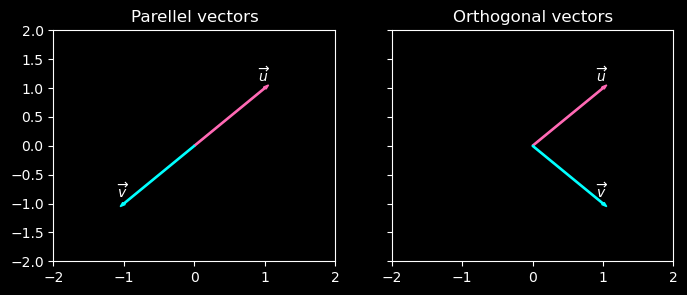

In [7]:
fig, axs = plt.subplots(1, 2, sharey= True, figsize=(8, 3))

temp = np.array([
    [[1, -1], [1, -1]],
    [[1, 1], [1, -1]]
    ])

titles = ['Parellel vectors', 'Orthogonal vectors']
for i in range(2):
    axs[i].arrow(0, 0, temp[i, 0, 0], temp[i, 1, 0],  width = 0.02, head_width=0.05, color='hotpink')
    axs[i].arrow(0, 0, temp[i, 0, 1], temp[i, 1, 1],  width = 0.02, head_width=0.05, color='cyan')
    axs[i].annotate(r'$\overrightarrow{u}$', xy = (temp[i, 0, 0] - 0.1 , temp[i, 0, 0] + 0.1))
    axs[i].annotate(r'$\overrightarrow{v}$', xy = (temp[i, 0, 1] -0.1, temp[i, 1, 1] + 0.1))
    axs[i].set_xlim(-2, 2)
    axs[i].set_ylim(-2, 2)
    axs[i].set_title(f'{titles[i]}')


##### Unit Vector

A unit vector is a vector of length 1. The unit vector $\hat{v}$ corresponding to vector $\overrightarrow{v}$ is defined to be
$$\hat{v} = \frac{\overrightarrow{v}}{\lVert \overrightarrow{v} \rVert}

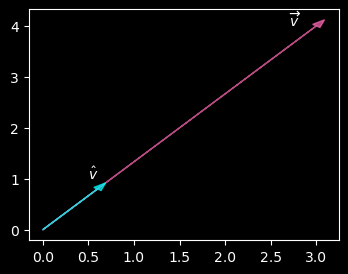

In [8]:
v = np.array([[3,], [4]])
v_hat = v / (np.sum(v**2)**0.5)

fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.arrow(0, 0, v[0, 0], v[1, 0], color = 'hotpink', head_width=0.1, alpha=0.7)
ax.arrow(0, 0, v_hat[0, 0], v_hat[1, 0], color='cyan', head_width=0.1, alpha=0.7)
ax.annotate(r'$\overrightarrow{v}$', xy=(2.7, 4))
ax.annotate(r'$\hat{v}$', xy=(0.5, 1));

##### Projection 

Projection of vector $\overrightarrow{u}$ onto $\overrightarrow{v}$ is:
$$proj_{\overrightarrow{v}} \overrightarrow{u} = \frac {\overrightarrow{u} \cdot \overrightarrow{v}} {\lVert \overrightarrow{v} \rVert^2} \overrightarrow{v}

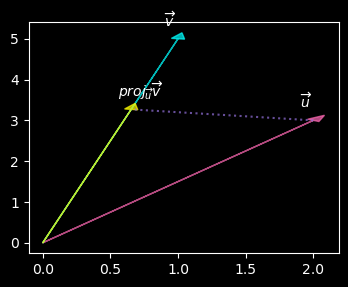

In [9]:
u = np.array([[2], [3]])
v = np.array([[1], [5]])

proj_u = (u.T @ v) / (np.sum(v**2)) * v

fig, ax = plt.subplots(1, 1, figsize=(4, 3))

an = [r'$\overrightarrow{u}$', r'$\overrightarrow{v}$', r'$proj_{\overrightarrow{u}} \overrightarrow{v}$']
for i, t in enumerate((u, v, proj_u)):
    ax.arrow(0, 0, t[0, 0], t[1, 0], color=colors[i], head_width = 0.1, alpha=0.7)
    ax.annotate(an[i], (t[0, 0] - 0.1, t[1, 0] + 0.3))
ax.plot((u[0, 0], proj_u[0, 0]), (u[1, 0], proj_u[1, 0]), ls = ':', color=colors[3], alpha=0.7)

#### Span

The set of all their linear combinations of a given pair of vectors is called span of those vectors.<br>
For independent (i.e $w \not = kv$ for all k) 2-d vectors span is complete 2-d space and for dependent vectors it is a line.

#### Rank

he rank of a matrix A is the dimension of the vector space generated (or spanned) by its columns. This corresponds to the maximal number of linearly independent columns of A.

In [10]:
x = np.random.randint(0, 10, (5, 5))
print(f'x:\n{x}\nrank:{np.linalg.matrix_rank(x)}')

x:
[[0 1 9 0 6]
 [9 7 8 0 1]
 [9 6 1 8 1]
 [1 8 4 1 2]
 [0 5 8 0 0]]
rank:5


#### Basis 

A set of vectors *B* for a vector space *V* are called its basis if:
- every vector in space *V* can be expressed as linear combination of vectors *B*. That is they span entire vector space.
- every vectors in *B* are linearly independent, that is no vector can be expressed as linear combination of the other vectors.
- Basis vectors *B* for a vector space *V* are not unique.

For a $\reals^2$ vector space, an obvious choice of basis vectors are (referred to as standard basis vectors):<br>
$V_1 = 
\begin{bmatrix}
1 \\
0
\end{bmatrix}
$
and
$V_2 = 
\begin{bmatrix}
0 \\
1
\end{bmatrix}
$

#### Column Spaces

- Span or set of all possible linear combinations of column vectors of matrix.
- The dimension of the column space is called *rank* of the martix and is at most *min(m, n)* for a *m x n* matix.

#### Null Space

- The null space of an matrix *A* consist of all the vectors *B* such that *AB = 0* and *B* is not zero.
- If *A* is a matrix of size *m by n*, then *B* forms a subset of vectors in subspace of $\reals^n$

In [11]:
u.T @ v

array([[17]])

### Visualising different Matrix Transformations

#### Matrix multiplication

Here Matrix multiplication with a vector is considered. This multiplication causes the vector to rotate and rescale as shown below.

In [12]:
x = np.array([1, 2]).reshape(-1, 1)
w = np.array([[2,  1], [-1, 1]])
y = w @ x
y

array([[4],
       [1]])

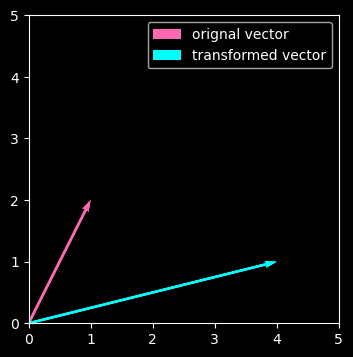

In [13]:
origin = np.array([[0,0,0], [0,0,0]])
plt.figure(figsize=(4, 4))
plt.quiver(*origin, x[0], x[1], angles='xy', scale_units='xy', scale=1, color=colors[0], label='orignal vector')
plt.quiver(*origin, y[0], y[1], angles='xy', scale_units='xy', scale=1, color=colors[1], label='transformed vector')
plt.xlim([0.0, 5])
plt.ylim([0.0, 5])
plt.legend();

#### Plotting Function

Observation:
- Multiplying a vector by a square matrix leads to rotation and scaling of the vector.

In [14]:
def get_square_mat(s:slice):
    d = np.arange(s.start, s.stop, s.step)
    x = np.repeat(d, d.shape[-1], axis=0)
    y = np.tile(d, reps=d.shape[-1])
    sq_mat = np.stack((x, y), 0)
    return sq_mat

sq_mat = get_square_mat(slice(-1, 1, 0.1))

In [15]:
def plot_transformation(x, w):
    y = w @ x
    plt.scatter(x[0,:], x[1,:], color=colors[0], alpha=0.7, label = 'orignal')
    plt.scatter(y[0,:], y[1,:], color=colors[1], alpha=0.3, label='transformed')
    plt.axhline(y=0.0, color='snow', linestyle='-', alpha=0.7)
    plt.axvline(x=0.0, color='snow', linestyle='-', alpha=0.7)
    plt.xlim([-5, 5])
    plt.ylim([-5, 5])
    plt.legend();

#### Scaler

While multiplying any vector matrix by Identity matrix leads to itself, multiplying a scaled identity matrix leads to scaling of the vecotr matrix.<br>
Scaler Matrix : $I \times k$, where $k \in \reals$<br>

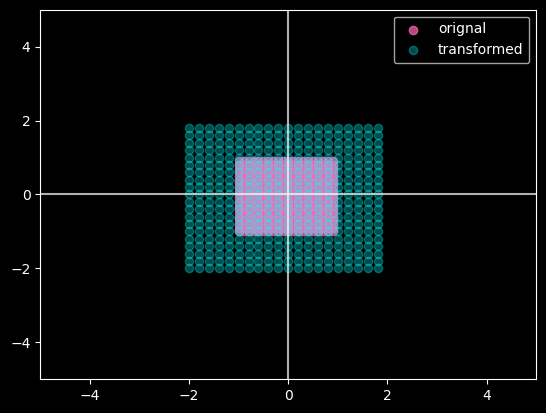

In [16]:
plot_transformation(sq_mat, 2*np.eye(2, 2))

#### Offset Identity Matrix

Offsetting a "1" value in identiy matrix by another scaler leads to scaling along the axis of the offsetted matrix (similar to scaler matrix but along a single axis).<br><br>
**Scaling Along X-axis**

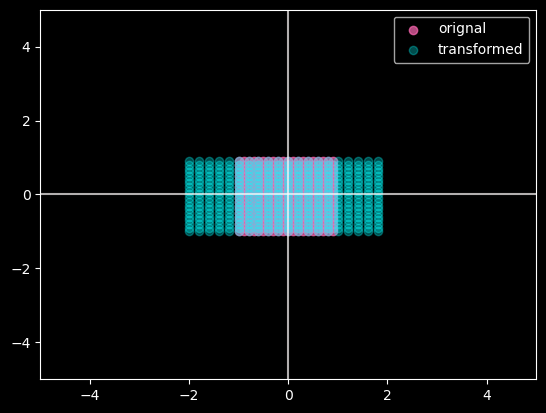

In [17]:
w = np.array([[2, 0], [0, 1]])
plot_transformation(sq_mat, w)

**Scaling Along Y-axis**

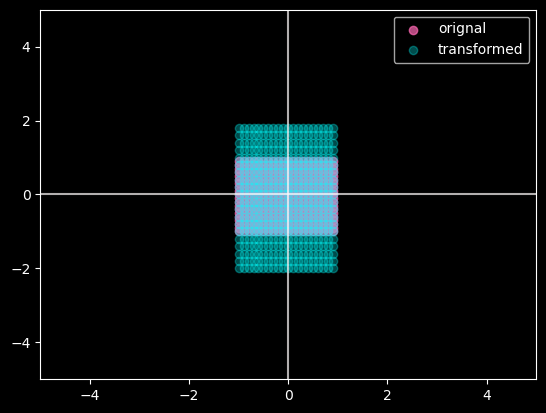

In [18]:
w = np.array([[1, 0], [0, 2]])
plot_transformation(sq_mat, w)

#### Reflection

Offseting the direction (i.e sign) of a "1" in indentity matrix leads to relflection along that axis in opposite quadrant.

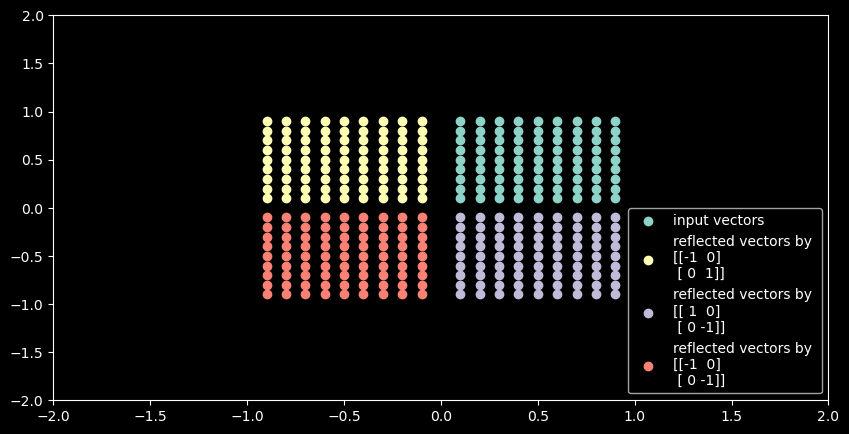

In [19]:
def plot_reflections():
    x = get_square_mat(slice(0.1, 1, 0.1))
    w1 = np.array([[-1, 0], [0, 1]])
    w2 = np.array([[1, 0], [0, -1]])
    w3 = np.array([[-1, 0], [0, -1]])


    plt.figure(figsize=(10, 5))
    plt.scatter(x[0,:], x[1,:], label='input vectors')
    for i in (w1, w2, w3):
        y = i @ x
        plt.scatter(y[0,:], y[1,:], label=f'reflected vectors by \n{i}')
    plt.axhline(y=0.0, color='black', linestyle='-', alpha=0.5)
    plt.axvline(x=0.0, color='black', linestyle='-', alpha=0.5)
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.legend(loc='lower right');

plot_reflections()


#### Diagonal Matrix

An intresting way of looking matrix to matrix multiplication is that a new transfomration (rotation and scaling) has to be obtained which is combination of two simpler transformations (discussed earlier). For instance, look at the example below.

In [20]:
w1 = np.array([[3, 0], [0, 1]])
w2 = np.array([[1, 0], [0, 2]])
w3 = w1 @ w2
print(
    f'Transformation-A (scaling along X-axis) :\n{w1}',
    f'\n\nTransformation-B (scaling along Y-axis) :\n{w2}',
    f'\n\nNew Transformation ("different" scaling along X-axis & Y-axis) :\n{w3}'
    )

Transformation-A (scaling along X-axis) :
[[3 0]
 [0 1]] 

Transformation-B (scaling along Y-axis) :
[[1 0]
 [0 2]] 

New Transformation ("different" scaling along X-axis & Y-axis) :
[[3 0]
 [0 2]]


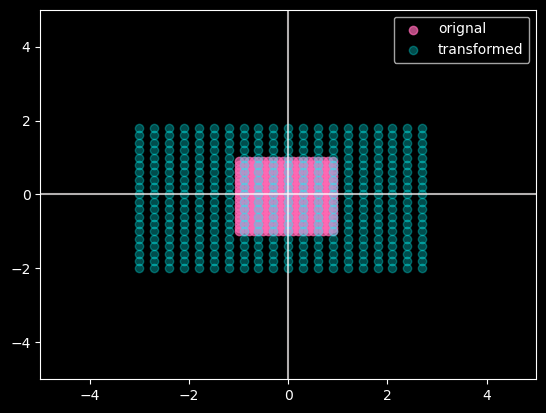

In [21]:
plot_transformation(sq_mat, w3)

#### Shear Matrix

Shear matrix is a matrix with one non-diaogonal element of the identity matrix as non-zero. It changes the shape instead of area as shown in previous sections

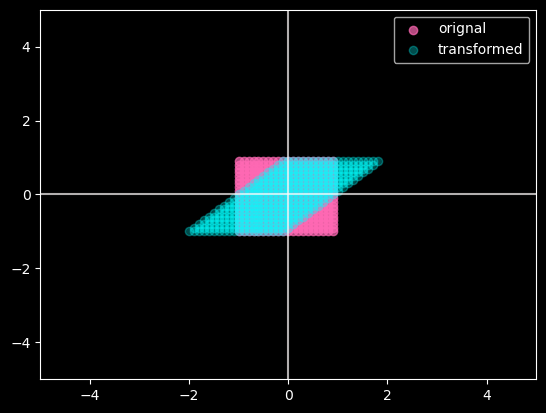

In [22]:
w = np.array([[1,1], [0,1]])
plot_transformation(sq_mat, w)

#### Orthogonal Matrix

A square matrix $\in \reals^{n \times n}$ is considered as Orthogonal Matrix if:
- all column vectors are unit vectors, i.e $\sqrt {\displaystyle\sum_{i=0}^{n}x_i^2} = 1$
- all column vectors are orthogonal, i.e. for each columns $x_{:,i}\cdot x_{:,j}=0$.

Consider the example to understand each requirement:

In [23]:
temp = 2**0.5 / 2
w = np.array([[temp, temp],[-temp, temp]])
print(
    f'Orignal Matrix:\n{w}',
    f'\n\nChecking if column vectors are unit vectors : {np.sum(w**2, axis=0)**-0.5}',
    f'\n\nChecking if column vectors are ortogonal: {w[0,:].T @ w[1,:]}'
    )

Orignal Matrix:
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]] 

Checking if column vectors are unit vectors : [1. 1.] 

Checking if column vectors are ortogonal: 0.0


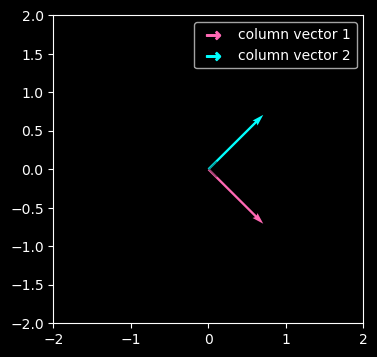

In [24]:
origin = np.array([[0,0], [0,0]])
plt.figure(figsize=(4, 4))
plt.quiver(origin[0,:], origin[1,:], w[0,:], w[1,:], angles='xy', scale_units='xy', scale=1, color=[colors[0], colors[1]])
plt.scatter([], [], marker=r'$\rightarrow$', s=100, label='column vector 1', color=colors[0])
plt.scatter([], [], marker=r'$\rightarrow$', s=100, label='column vector 2', color=colors[1])
k = 0.1
plt.fill([0, k, k*2, k], [0, k, 0, -k], color='black', alpha=0.25)
plt.xlim([-2, 2])
plt.ylim([-2, 2]);
plt.legend();

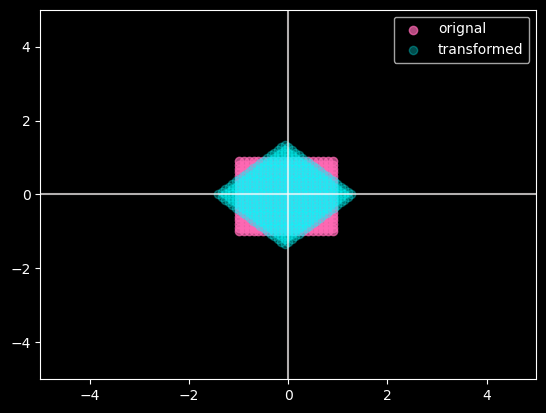

In [25]:
plot_transformation(sq_mat, w)

#### Projection Matrix

##### Projections onto a Line

When we project a vector $b$ onto a line we want to find the point on the line closest to the vector b.
Let this vecotr that points from origin to the closest point be $p$. The vector that points from $p$ to $b$ is called "error vector", and it will be perpendicular to $p$. Let the direction vector parellel to the line be $a$, So our vector $p$ will be some constant multiple of this direction vector. So $p = \hat{x} a $. We want to calculate $x$.<br>
Now the error vector $ e = b - p $ will be perpendicular to $a$, so
$$a \cdot (b - \hat{x}a) = 0$$
We can rewrite this as 
$$a \cdot b = \hat{x} a \cdot a$$
and solve for $\hat{x}$ to get:
$$\hat{x} = \frac {a \cdot b}{a \cdot a}$$
So the projection $p$ of a vector $b$ onto the line spanned by direction of $a$ will be:
$$p = \frac{a^T b} {a^T a} a$$

(0.0, 4.0)

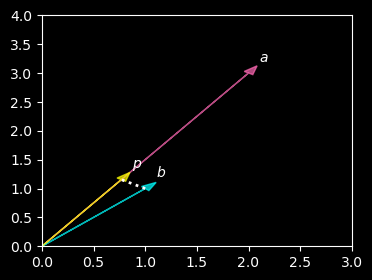

In [26]:
a = np.array([[2], [3]])
b = np.array([[1], [1]])
p = a.T @ b / (a.T @ a) * a


fig, ax = plt.subplots(1, 1, figsize=(4, 3))

an = [r'$a$', r'$b$', r'$p$']
for i, t in enumerate((a, b, p)):
    ax.arrow(0, 0, t[0, 0], t[1, 0], color=colors[i], head_width = 0.1, alpha=0.7)
    ax.annotate(an[i], (t[0, 0] + 0.1, t[1, 0] + 0.2))
ax.plot((b[0, 0], p[0, 0]), (b[1, 0], p[1, 0]), ls = ':', lw=2.0, color='snow')
ax.set_xlim(0, 3)
ax.set_ylim(0, 4)

##### Projections onto a Subspace

Suppose we have a higher-dimensional subspace *V* , and we want to project a vector *b* onto it. First,
we need a description of *V* , and the best description is a set of basis vectors. So, suppose *V* is a subspace of $\mathbb{R}^m$ with basis **a1, . . . , an**. The projection of *b* onto *V* is the vector in *V* closest to *b*. This projection vector, *p*,
will be by definition a linear combination of the basis vectors of V :
$$ p = \hat{x}_1 a_1 + \dots + \hat{x}_n a_n.$$

If A is a matrix with column vectors **a1, . . . , an** and $\hat{x}$ is a vector with
components $\hat{x}_1, \dots, \hat{x}_n$ then $p = A\hat{x}$. The error vector, the vector that points
from *p* to *b*, will be $e = b − p = b − A\hat{x}$. This error vector will be perpendicular to the subspace *V* , which is equivalent to being perpendicular to the basis vectors **a1, . . . , an**. 
So,
$$ A^T(b - A\hat{x}) = 0 \\
\Rightarrow A^TA\hat{x} = A^Tb
\Rightarrow \hat{x} = (A^T A) ^{-1}A^Tb
$$
Here we assume $A^TA$ is invertible. Now, the projection vector *p* equals to
$$ p = A (A^T A)^{-1}A^T b$$

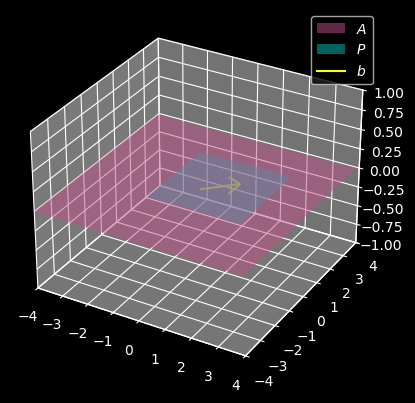

In [27]:
A = np.array([[1, 2], [2, 3]])
b = np.array([[1], [1]])
p = A * np.linalg.inv(A.T * A) * A.T * b

x = np.arange(np.min(p[0,:], axis=0), np.max(p[0,:], axis=0), 0.01)
y = np.arange(np.min(p[1,:], axis=0), np.max(p[1,:], axis=0), 0.01)
X, Y = np.meshgrid(np.arange(-4, 4, 0.1), np.arange(-4, 4, 0.1))
X_, Y_ = np.meshgrid(x, y)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, np.zeros_like(X), color=colors[0], alpha=0.5, label=r'$A$')
ax.plot_surface(X_, Y_, np.zeros_like(X_), color=colors[1], alpha=0.5, label=r'$P$')
ax.quiver(0, 0, 0, 1, 1, 0, color='yellow')
ax.plot([], [], [], color='yellow', label=r'$b$')
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_zlim(-1, 1)
plt.legend();
# plt.arrow(0, 0, b[0, 0], b[1, 0], head_width=0.1, color=colors[2])
# for i in range(2):
#     plt.arrow(0, 0, p[0,i], p[1, i], head_width=0.1, color=colors[i])


**Note:** Determinant of matrix determines the area of the transformation. If determinant is zero matrix is projected to a line. We talk more about this when we talk about determinants.

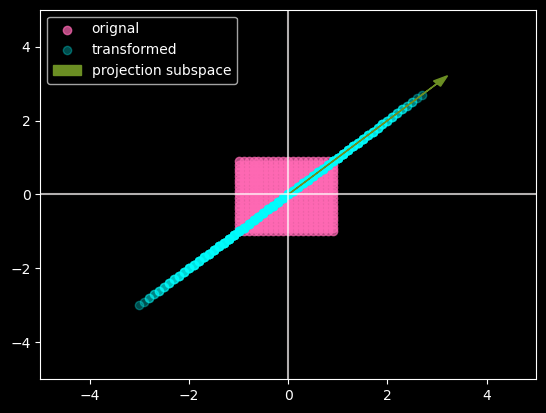

In [28]:
A = np.array([[1, 2], [1, 2]])

plot_transformation(sq_mat, A)
plt.arrow(0,0, 3* A[0, 0], 3 * A[1, 0], color='olivedrab', head_width=0.2, label='projection subspace')
plt.legend();

#### Inverse Matrix

Inverse of matrix *A* is defined as $A^{-1}A = I$. Visually it untransforms the transformation applied by *A*

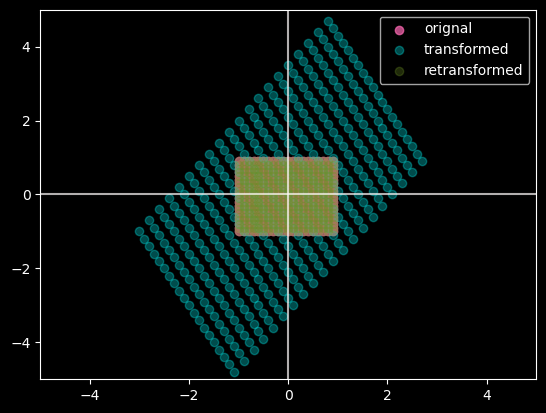

In [29]:
w = np.array([[1, 2],[-2, 3]])
w_inv = np.linalg.inv(w)
y_ = w_inv @ (w @ sq_mat)
plot_transformation(sq_mat, w)
plt.scatter(y_[0,:], y_[1,:], label='retransformed', alpha=0.3, color='olivedrab')
plt.legend()

From above visualisation an important property of inverse matricies can be understood:<br><br>
**Inverse does not exsist for non-square matrices**. This is because a non square matrix of shape mxn, it transforms orignal vectors from $\reals^m$ to a $\reals^n$ dimensional vector space. That is the transformation either *adds* (if n > m) or *removes* information (if m > n), and there does not exsist an inverse transformation which **exactly** gives the information added or lost after applying transformation.

#### Determinant

Visually determinant of a matix is the factor by which area comprised by vector space is scaled when transformation is applied by the matrix. <br><br>
For example below determinant of matrix is '3' and when it is applied to scattered points the area spanned by sacttered points increases by factor of '3'.

Determinant of matrix : 3.0


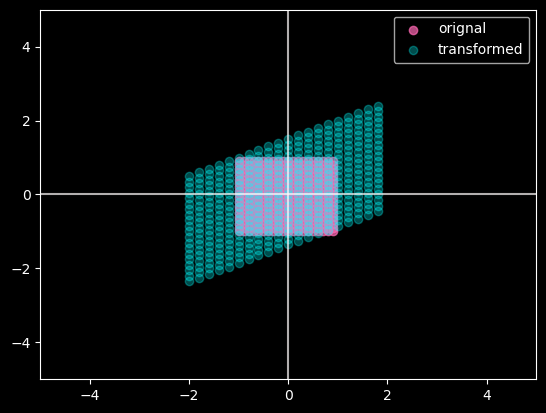

In [30]:
w = np.array([[0, 2],[-1.5, 1]])
print(f'Determinant of matrix : {np.linalg.det(w):.4}')
plot_transformation(sq_mat, w)

If determinant is zero, the area is zero and vectors get projected to a line.

Determinant of matrix : 0.0


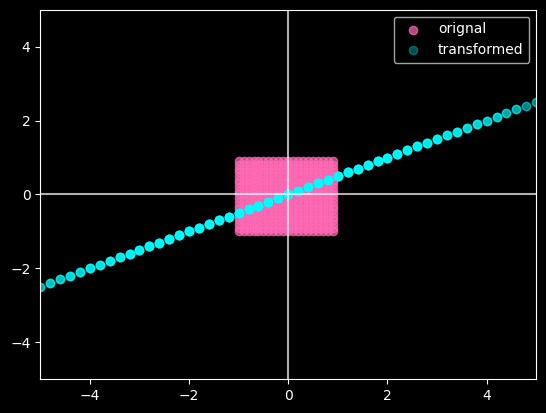

In [31]:
w = np.array([[4, 2],[2, 1]])
print(f'Determinant of matrix : {np.linalg.det(w):.4}')
plot_transformation(sq_mat, w)

If determninat is negative the scaled vectors are reflected/flipped as well. Area is scaled equal to the magnitude.

Determinant of matrix : -3.0


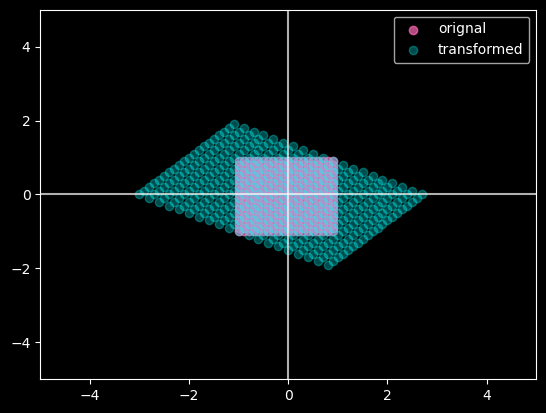

In [32]:
w = np.array([[1, 2],[1, -1]])
print(f'Determinant of matrix : {np.linalg.det(w):.4}')
plot_transformation(sq_mat, w)

### Trace of Matrix

Sum of main diagonal elements

In [33]:
A = np.array([[1,2],[3,4]])
print(f'Trace of matrix : {np.trace(A)}')

Trace of matrix : 5


### Matrix Transpose

Transpose of a matrix is obtained by interchanging the rows and columns of the given matrix or vice versa.<br><br>
$
A = [a_{ij}] \in \reals^{m\times n} \\[1em]
A^t = [a_{ji}] \in \reals^{n\times m}
$

In [34]:
A = np.random.randint(0, 10, (3, 3))
print(f'Matrix A :\n{A}\nTranspose of matrix A:\n{A.transpose(-1, -2)}')


Matrix A :
[[5 9 5]
 [1 0 1]
 [2 3 3]]
Transpose of matrix A:
[[5 1 2]
 [9 0 3]
 [5 1 3]]


#### Properties

In [35]:
A = np.random.randint(0, 5, (3, 3))
B = np.random.randint(0, 5, (3, 3))
print(f'\nA:\n{A}\n\nB:\n{B}')


A:
[[2 0 4]
 [2 1 0]
 [3 2 2]]

B:
[[0 0 0]
 [2 2 4]
 [1 2 1]]


##### Property 1

$(A + B)^T = A^T + B^T$

In [36]:
print(
    f'\n\n(A+B)^T :\n{np.transpose((A+B), axes=(-1, -2))}',
    f'\n\nA^T + B^T :\n{A.transpose(-1, -2) + B.transpose(-1, -2)}'
    )



(A+B)^T :
[[2 4 4]
 [0 3 4]
 [4 4 3]] 

A^T + B^T :
[[2 4 4]
 [0 3 4]
 [4 4 3]]


##### Property 2

$(AB)^T = B^TA^T$

In [37]:
print(
    f'\nA:\n{A}\n\nB:\n{B}'
    f'\n\n(A.B)^T :\n{np.transpose((A@B), axes=(-1, -2))}',
    f'\n\nA^T.B^T :\n{A.transpose(-1, -2) @ B.transpose(-1, -2)}',
    f'\n\nB^T.A^T :\n{B.transpose(-1, -2) @ A.transpose(-1, -2)}'
    )


A:
[[2 0 4]
 [2 1 0]
 [3 2 2]]

B:
[[0 0 0]
 [2 2 4]
 [1 2 1]]

(A.B)^T :
[[ 4  2  6]
 [ 8  2  8]
 [ 4  4 10]] 

A^T.B^T :
[[ 0 20  9]
 [ 0 10  4]
 [ 0 16  6]] 

B^T.A^T :
[[ 4  2  6]
 [ 8  2  8]
 [ 4  4 10]]


##### Property 3

$(A^T)^T = A$

In [38]:
print(f'A:\n{A}\n\n(A^T)^T:\n{A.transpose(-1, -2).transpose(-1, -2)}')

A:
[[2 0 4]
 [2 1 0]
 [3 2 2]]

(A^T)^T:
[[2 0 4]
 [2 1 0]
 [3 2 2]]


##### Property 4

$(A^{-1})^T = (A^T)^{-1}$<br><br>
Proof:<br><br>
$(A^{-1})^T = (A^{-1})^TI = (A^{-1})^T(A^T(A^T)^{-1}) = (AA^{-1})^T(A^T)^{-1} = (A^T)^{-1}$

In [39]:
print(
    f'(A^-1)^T:\n{np.transpose(np.linalg.inv(A), axes=(-1, -2))}',
    f'\n\n(A^T)^-1:\n{np.linalg.inv(A.transpose(-1, -2))}'
    )

(A^-1)^T:
[[ 0.25  -0.5    0.125]
 [ 1.    -1.    -0.5  ]
 [-0.5    1.     0.25 ]] 

(A^T)^-1:
[[ 0.25  -0.5    0.125]
 [ 1.    -1.    -0.5  ]
 [-0.5    1.     0.25 ]]


### Invariant Dot Product

Let, $\overline{x} = Ax \; and \; \overline{v} = Av$ <br>
Condition $v\cdot x = \overline{v} \cdot \overline{x}$<br>
We know for vectors: $v\cdot x = v^Tx$<br>
And $\overline{v}\cdot\overline{x} = (\overline{v})^T \overline{x}= (Av)^T(Ax) = v^T(A^TA)x$<br>
That is $A^TA = I$ or $A^T = A^{-1}$, which means A is an orthogonal matrix. <br>
Thus, linear transformation only preserve dot product when transformation matrix is orthogonal.<br><br>
Conversely if we want to preserve dot product between x and v, with there transformations, now defined as
$\overline{x} = Ax \; and \; \overline{v} = Mv$, <br> than $M^T= A^{-1} \Rightarrow M = (A^{-1})^T$

#### Connection with Transpose

From above discussion, we observed that for dot product to be invariant to a transformation, the folllowing must be satisfied:<br>
$ \overline{x} = Ax \; and \; \overline{v} = (A^{-1})^Tv$<br>
That means transformation $\overline{x}$ exsist only if A is invertible. But, intuitively we should have a dot product even if A was not invertible.<br><br>
So, we change some notations here:
- Orignal notation: $x$ and $v$ in input space, are being transformed by $A$ and $(A^{-1})^T$ to $\overline{x}$ and $\overline{v}$ in output space.
- New notation:  $x$  in input space is transformed by $A$  to $\overline{x}$ in ouput space, while $\overline{v}$ in output space is transformed by $A^T$ to $v$ in input space. New equations become : $\overline{x} = Ax \; and \; v = A^T\overline{v}$

And subsitutting new values in $v\cdot x = \overline{v} \cdot \overline{x}$,<br>  we get $(A^T\overline{v})\cdot x = \overline{v} \cdot Ax$

#### Transpose vs Inverse

From the intuition developed, a non-square matrix of $m\times n$ dimensions transforms a vector from $\reals^m \to \reals^n$ dimension and a transposes reverses it. This seems analogous to an inverese applied for square matricies.

In [40]:
x = np.array([[1], [2]])
A = np.random.randint(0, 5, (2,3))
Ax = A.T @ x
print(f'input:\n{x}\nA.x:\n{Ax}\nA^T.(A.x):\n{A@Ax}')

input:
[[1]
 [2]]
A.x:
[[9]
 [8]
 [9]]
A^T.(A.x):
[[ 18]
 [104]]


While the transpose does not help us get orignal values as compared to inverese, it helps us go to back to orignal vector space.